In [61]:
import cv2
import os
import numpy as np
from PIL import Image
img = Image.open('24_F_2_R_D_2_1.jpg')
img_numpy = np.array(img, 'uint8')
gray = cv2.cvtColor(img_numpy, cv2.COLOR_BGR2GRAY) #바꾸려는 img가 이미 gray이면 에러남
cv2.imwrite('24_F_2_R_D_2_1_gray.jpg', gray)

True

https://opencv-python.readthedocs.io/en/latest/doc/13.imageGradient/imageGradient.html
https://handmap.github.io/gradients-and-edge-detection/

### 'origin','Laplacian', 'Sobel X', 'Sobel Y','Canny','bitsize_or','bitwise_or_blur','bitwise_or_blur_canny' 비교

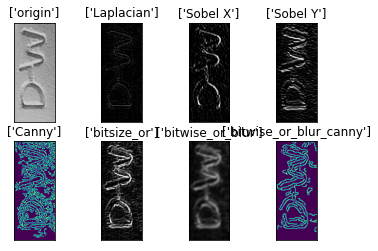

In [62]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('24_F_2_R_D_2_1_gray.jpg')
canny = cv2.Canny(img,30,70)

laplacian = cv2.Laplacian(img,cv2.CV_8U) #전체 방향으로의 가장자리를 추출
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
bitwise_or = cv2.bitwise_or(sobelx,sobely)
bitwise_or_blur = cv2.GaussianBlur(bitwise_or, (9, 9), 0)
bitwise_or_blur_canny = cv2.Canny(bitwise_or_blur,20,80)
images = [img,laplacian, sobelx, sobely, canny,bitwise_or,bitwise_or_blur,bitwise_or_blur_canny]
titles = ['origin','Laplacian', 'Sobel X', 'Sobel Y','Canny','bitsize_or','bitwise_or_blur','bitwise_or_blur_canny']

for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i]),plt.title([titles[i]])
    plt.xticks([]),plt.yticks([])

plt.show()

### bitwise_or에 GaussianBlur,Canny 다양하게

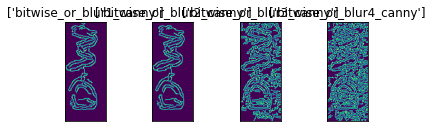

In [64]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('24_F_2_R_D_2_1_gray.jpg')
canny = cv2.Canny(img,30,70)

laplacian = cv2.Laplacian(img,cv2.CV_8U) #전체 방향으로의 가장자리를 추출
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
bitwise_or = cv2.bitwise_or(sobelx,sobely)
bitwise_or_blur1 = cv2.GaussianBlur(bitwise_or, (9, 9), 0) #9,20,100
bitwise_or_blur1_canny = cv2.Canny(bitwise_or_blur,20,120)

bitwise_or_blur2 = cv2.GaussianBlur(bitwise_or, (9, 9), 0) ###얘로
bitwise_or_blur2_canny = cv2.Canny(bitwise_or_blur2,20,140)

bitwise_or_blur3 = cv2.GaussianBlur(bitwise_or, (5, 5), 0)
bitwise_or_blur3_canny = cv2.Canny(bitwise_or_blur3,20,100)

bitwise_or_blur4 = cv2.GaussianBlur(bitwise_or, (3, 3), 0)
bitwise_or_blur4_canny = cv2.Canny(bitwise_or_blur4,20,100)

images = [bitwise_or_blur1_canny,bitwise_or_blur2_canny,bitwise_or_blur3_canny,bitwise_or_blur4_canny]
titles = ['bitwise_or_blur1_canny','bitwise_or_blur2_canny','bitwise_or_blur3_canny','bitwise_or_blur4_canny']

for i in range(4):
    plt.subplot(2,4,i+1),plt.imshow(images[i]),plt.title([titles[i]])
    plt.xticks([]),plt.yticks([])

plt.show()

In [58]:
import os
file_list = os.listdir("val/test/") ###변환 전 train img 위치
for i in file_list:
    img = cv2.imread('val/test/'+i)
    canny = cv2.Canny(img,30,70)

    laplacian = cv2.Laplacian(img,cv2.CV_8U) #전체 방향으로의 가장자리를 추출
    sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
    sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
    bitwise_or = cv2.bitwise_or(sobelx,sobely)
    bitwise_or_blur1 = cv2.GaussianBlur(bitwise_or, (7, 7), 0) #9,20,100
    bitwise_or_blur1_canny = cv2.Canny(bitwise_or_blur,20,120)
    #plt.imshow(bitwise_or_blur1_canny)
    cv2.imwrite("scaled_val/"+i, bitwise_or_blur1_canny)

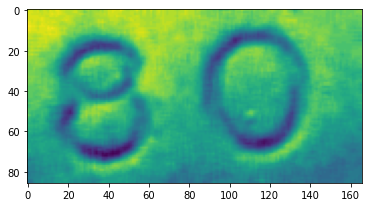

In [12]:
import cv2
import numpy as np
from PIL import Image

im = Image.open('126_F_1_R_D_1_1_gray.jpg') # Image load
im_array = np.asarray(im) # Image to np.array

kernel1d = cv2.getGaussianKernel(5, 3)
kernel2d = np.outer(kernel1d, kernel1d.transpose())

low_im_array = cv2.filter2D(im_array, -1, kernel2d) # convolve

low_im = Image.fromarray(low_im_array) # np.array to Image
plt.imshow(low_im)
low_im.save('126_F_1_R_D_1_1_gray_gau.jpg','BMP')

In [5]:
import numpy as np
import cv2

# Load the image, convert it to grayscale, and blur it
# slightly to remove high frequency edges that we aren't
# interested in
#image = cv2.imread("126_F_1_R_D_1_1_gray.jpg")
#image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.GaussianBlur(bitwise_or, (5, 5), 0)
#cv2.imshow("Blurred", image)
cv2.imwrite("blurred.png", image)

# When performing Canny edge detection we need two values
# for hysteresis: threshold1 and threshold2. Any gradient
# value larger than threshold2 are considered to be an
# edge. Any value below threshold1 are considered not to
# ben an edge. Values in between threshold1 and threshold2
# are either classified as edges or non-edges based on how
# the intensities are "connected". In this case, any gradient
# values below 30 are considered non-edges whereas any value
# above 150 are considered edges.
canny = cv2.Canny(image, 30, 150)
#cv2.imshow("Canny", canny)
cv2.imwrite("canny-img.png", canny)
cv2.waitKey(0)

-1

In [57]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('126_F_1_R_D_1_1_gray.jpg')
canny = cv2.Canny(img,30,70)

laplacian = cv2.Laplacian(img,cv2.CV_8U) #전체 방향으로의 가장자리를 추출
sobelx = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
sobely = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
bitwise_or = cv2.bitwise_or(sobelx,sobely)